
# Projet 2

In [156]:
# import des modules usuels
import numpy as np
import pandas as pd
import json
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
# options d'affichage
pd.set_option("display.min_rows", 16)

In [157]:
# chargement et traitement des données
geo = pd.read_csv("correspondance-code-insee-code-postal.csv",
                   sep=';',
                   usecols=range(11),
                   index_col="Code INSEE")
geo = geo.sort_index()
geo[['Latitude', 'Longitude']] = geo["geo_point_2d"].str.extract("(.*), (.*)").astype(float)
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude
Code INSEE,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",46.153426,4.926114
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",46.009188,5.428017
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",45.960848,5.372926
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",45.996180,4.912273
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",45.749499,5.594320


**Projet maison n° 1**

- Ajoutez une colonne 'CP Ville' avec le Code postal + un espace + et le nom de la Ville.
- Ecrivez une fonction qui détermine la commune la plus proche d'un point à partir de sa latitude et sa longitude.
- Ajoutez une fonction de conversion pour pouvoir utiliser la première fonction avec un GPS (degrés, minutes, secondes).

In [158]:
geo['CP Ville'] = geo['Code Postal'] + ' ' + geo['Commune']

In [159]:
def haversine_distance(lat1, lon1, lat2, lon2):
    r = 6371
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    a = np.sin((lat2 - lat1) / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2 - lon1) / 2)**2
    res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
    return np.round(res, 2)
# fonction recherche de ville
def ville(lat, long):
    distances=[]
    for row in geo.itertuples(index=False):
        distances.append(haversine_distance(lat, long, row.Latitude, row.Longitude))
    return geo.Commune[np.argmin(distances)]

In [160]:
# conversion degrés, minutes, secondes => décimal
def dms2dec(deg, mn, sec):
    return deg + mn / 60 + sec / 3600

In [161]:
# on applique la fonction à une coordonnée tirée au hasard
# init du random
np.random.seed(0)

a, b = 41.5, 51.1  # latitude min et max de la France métropolitaine
lat = (b - a) * np.random.random() + a
a, b = -5.1, 9.5  # longitude min et max de la France métropolitaine
long = (b - a) * np.random.random() + a

ville(lat, long)

'BOSJEAN'

In [162]:
# à partir de coordonnées GPS précises
ville(dms2dec(48, 42, 52), dms2dec(2, 14, 45))

'PALAISEAU'

**Projet maison n° 2**

La colonne "geo_shape" comporte des chaines de catactères au format JSON. Elles représentent les formes géométriques des communes qui sont soit des polygones soit composées de plusieurs polygones.

- Utiliser la librairie Python json pour parser la colonne "geo_shape".
- Donner le décompte des valeurs accédées avec la clé "type".
- Donner le décompte des longueurs des listes accédées avec la clé "coordinates".
- Quelle commune est la plus complexe géométriquement ?
- Quelle commune est la seconde la plus complexe géométriquement ?
- Quelles sont les villes qui sont de type "Polygon" mais dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?
- Pour ces villes vérifier que le premier polygone contient bien le second (enclave). NB : installer la librairie shapely, utiliser la classe Polygon de shapely.geometry. Sur Windows shapely peut nécessiter d'installer la dll "geos_c.dll" dans le répertoire "Library/bin" de votre environnement Python.

In [163]:
geo_shape=pd.json_normalize(geo.geo_shape.apply(json.loads))
geo_shape=geo_shape.set_index(geo.index)

In [164]:
geo_shape

,type,coordinates
Code INSEE,,
01001,Polygon,"[[[4.92627342692396, 46.1200517234555], [4.921..."
01002,Polygon,"[[[5.430089291292173, 45.98275997279625], [5.4..."
01004,Polygon,"[[[5.386190824025674, 45.930927620632], [5.374..."
01005,Polygon,"[[[4.895580369408855, 45.97991618124606], [4.8..."
01006,Polygon,"[[[5.614854625053272, 45.734638855121595], [5...."
01007,Polygon,"[[[5.413533405897647, 45.97889779714948], [5.3..."
01008,Polygon,"[[[5.321986043355919, 45.92234494663176], [5.3..."
01009,Polygon,"[[[5.65639346945457, 45.76021095279123], [5.64..."
...,...,...


- Donner le décompte des valeurs accédées avec la clé "type".

In [165]:
geo_shape.type.value_counts()

Polygon         36670
MultiPolygon       72
Name: type, dtype: int64

- Donner le décompte des longueurs des listes accédées avec la clé "coordinates".

In [166]:
geo_shape['coordinates'].str.len().value_counts()

1    36660
2       80
3        1
4        1
Name: coordinates, dtype: int64

- Quelle commune est la plus complexe géométriquement ?

In [167]:
n=geo_shape['coordinates'].str.len().max()
geo[geo_shape['coordinates'].str.len()==n]['Commune']

Code INSEE
83069    HYERES
Name: Commune, dtype: object

- Quelle commune est la seconde la plus complexe géométriquement ?

In [168]:
geo[geo_shape['coordinates'].str.len()==3]['Commune']

Code INSEE
27701    VAL-DE-REUIL
Name: Commune, dtype: object

- Quelles sont les villes qui sont de type "Polygon" mais dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?

In [169]:
villes=geo[(geo_shape.type== "Polygon") & (geo_shape['coordinates'].str.len()== 2)]['Commune']
villes

Code INSEE
02232               COYOLLES
05052               EYGLIERS
09042    LA BASTIDE-DE-SEROU
22209              PLOUBALAY
2A272                SARTENE
2B049              CALENZANA
48080               LANGOGNE
67486              SUNDHOUSE
68078              EGUISHEIM
71028            BEAUVERNOIS
Name: Commune, dtype: object

- Pour ces villes vérifier que le premier polygone contient bien le second (enclave). NB : installer la librairie shapely, utiliser la classe Polygon de shapely.geometry. Sur Windows shapely peut nécessiter d'installer la dll "geos_c.dll" dans le répertoire "Library/bin" de votre environnement Python.

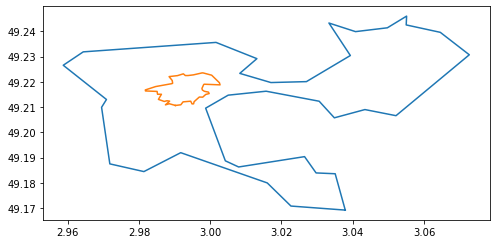

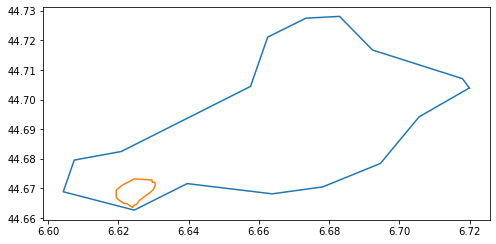

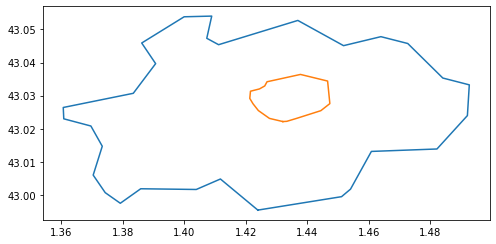

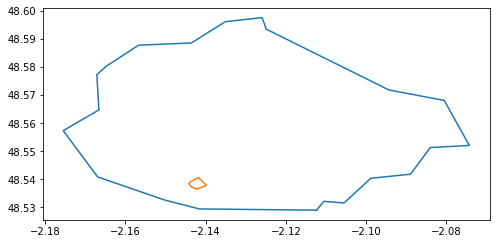

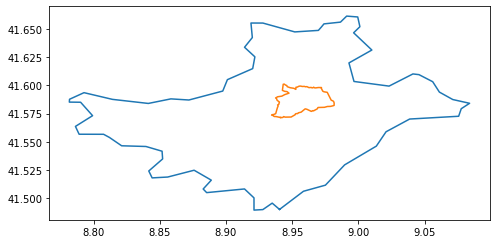

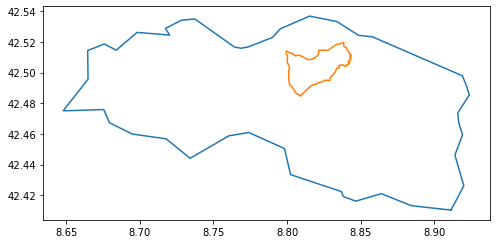

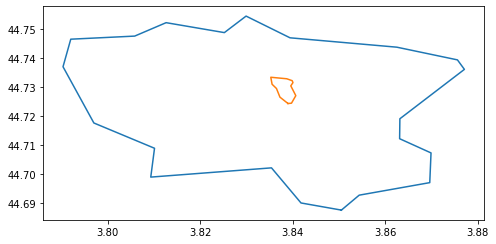

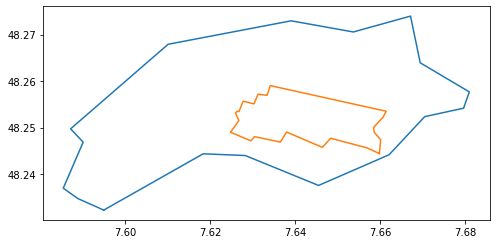

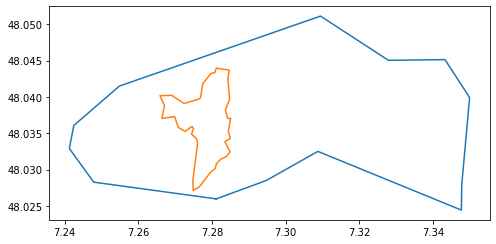

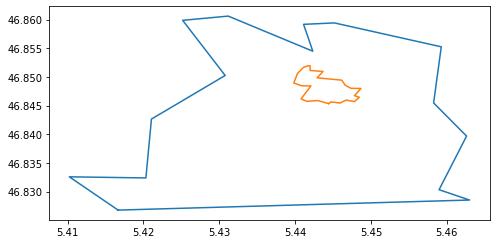

In [170]:
s=geo_shape.coordinates.loc[list(villes.index)]
for index, polygons in s.items():
    plt.subplots()
    for polygon in polygons:
        plt.plot(*Polygon(polygon).exterior.xy)
plt.show()